#### Question 1: What was the best month for sales? How much was earned that month?
#### Question 2: What city sold the most product?
#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
#### Question 4: What products are most often sold together?
#### Question 5: What product sold the most? Why do you think it sold the most?

In [22]:
# install the library
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

from itertools import combinations
from collections import Counter

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


In [23]:
# read the dataframe
data = pd.read_csv('Sales Data.csv')

# drop the index column
data = data.drop('Unnamed: 0', axis=1)

# show the data 
data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Price Category,Order Date,Year,Month Name,Hour,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,Low,2019-04-19 08:46:00,2019,April,8,"917 1st St, Dallas, TX 75001",Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,99.99,Medium,2019-04-07 22:30:00,2019,April,22,"682 Chestnut St, Boston, MA 02215",Boston MA
2,176560,Google Phone,1,600.00,600.00,High,2019-04-12 14:38:00,2019,April,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
3,176560,Wired Headphones,1,11.99,11.99,Low,2019-04-12 14:38:00,2019,April,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176561,Wired Headphones,1,11.99,11.99,Low,2019-04-30 09:27:00,2019,April,9,"333 8th St, Los Angeles, CA 90001",Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,8.97,Low,2019-09-17 20:56:00,2019,September,20,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA
185682,259354,iPhone,1,700.00,700.00,High,2019-09-01 16:00:00,2019,September,16,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA
185683,259355,iPhone,1,700.00,700.00,High,2019-09-23 07:39:00,2019,September,7,"220 12th St, San Francisco, CA 94016",San Francisco CA
185684,259356,34in Ultrawide Monitor,1,379.99,379.99,High,2019-09-19 17:30:00,2019,September,17,"511 Forest St, San Francisco, CA 94016",San Francisco CA


In [24]:
# take a copy from dataframe
df = data.copy()

In [25]:
# data describe
df.describe()

,Order ID,Quantity Ordered,Price Each,Sales,Year,Hour
count,"185,686.00","185,686.00","185,686.00","185,686.00","185,686.00","185,686.00"
mean,"230,411.38",1.12,184.52,185.61,"2,019.00",14.41
std,"51,511.72",0.44,332.84,333.03,0.01,5.42
min,"141,234.00",1.00,2.99,2.99,"2,019.00",0.00
25%,"185,833.25",1.00,11.95,11.95,"2,019.00",11.00
50%,"230,354.50",1.00,14.95,14.95,"2,019.00",15.00
75%,"275,028.75",1.00,150.00,150.00,"2,019.00",19.00
max,"319,670.00",9.00,"1,700.00","3,400.00","2,020.00",23.00


#### What was the best month for sales? How much was earned that month?

In [26]:
# Group the DataFrame by 'Month Name' and calculate the sum of 'Sales' for each month
sales_by_month = df.groupby('Month Name')['Sales'].sum()

# Sort the results in descending order based on the sum of sales
sorted_sales_by_month = sales_by_month.sort_values(ascending=False)

# Reset the index to make the result a DataFrame with a new default index
sales_by_month_df = sorted_sales_by_month.reset_index()

# Display the DataFrame with formatted 'Sales' column
pd.set_option('display.float_format', '{:,.2f}'.format)

# show the result
sales_by_month_df

,Month Name,Sales
0,December,"4,608,295.70"
1,October,"3,734,777.86"
2,April,"3,389,217.98"
3,November,"3,197,875.05"
4,May,"3,150,616.23"
5,March,"2,804,973.35"
6,July,"2,646,461.32"
7,June,"2,576,280.15"
8,August,"2,241,083.37"
9,February,"2,200,078.08"


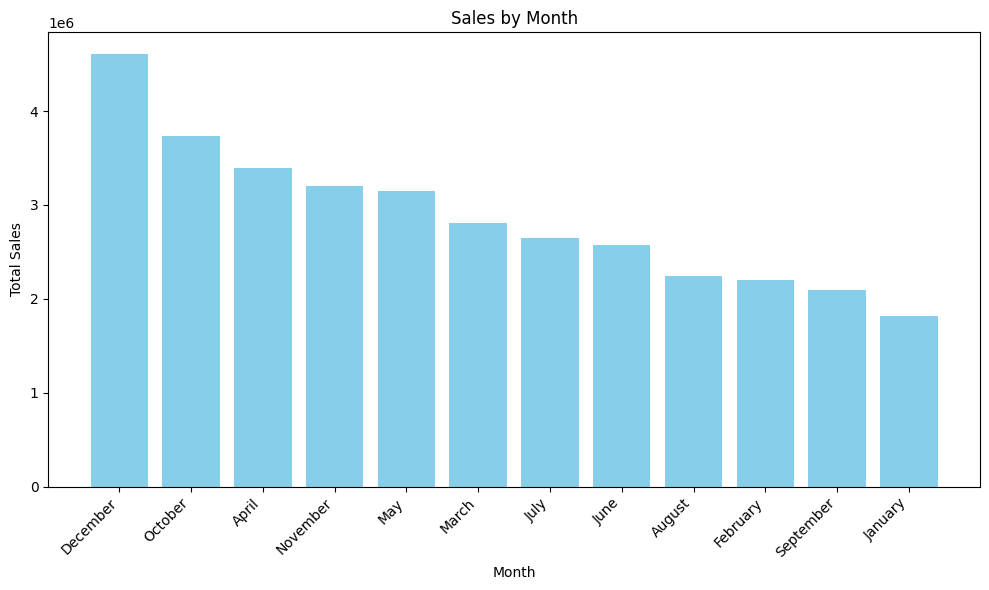

In [27]:
# Plotting the sales data by month
plt.figure(figsize=(10, 6))
plt.bar(sales_by_month_df['Month Name'], sales_by_month_df['Sales'], color='skyblue')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [28]:
# Define the order of months for sortin like this becouse in i sortin the data by Sales
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set the 'Month Name' column as a categorical variable with custom order
sales_by_month_df['Month Name'] = pd.Categorical(sales_by_month_df['Month Name'], categories=month_order, ordered=True)

# Sort the DataFrame by the custom order of months
sales_by_month_df = sales_by_month_df.sort_values('Month Name')

# Create a line chart using plotly express
fig = px.line(sales_by_month_df, x='Month Name', y='Sales', markers=True, line_shape='linear')

# Update axis labels and title
fig.update_layout(
    title='Sales for each Months',
    xaxis_title='Month',
    yaxis_title='Total Sales',
    xaxis=dict(tickmode='array', tickvals=list(month_order), ticktext=list(month_order))
)

# Show the plot
fig.show()

In [29]:
# Group the DataFrame by 'Month Name' and calculate the sum of 'Quantity Ordered' for each month
Quantity_by_month = df.groupby('Month Name')['Quantity Ordered'].sum()

# Sort the results in descending order based on the sum of Quantity orders
sorted_Quantity_by_month = Quantity_by_month.sort_values(ascending=False)

# Reset the index to make the result a DataFrame with a new default index
Quantity_by_month_df = sorted_Quantity_by_month.reset_index()

# show the result
Quantity_by_month_df

,Month Name,Quantity Ordered
0,December,28074
1,October,22669
2,April,20536
3,November,19769
4,May,18653
5,March,16979
6,July,16054
7,June,15234
8,February,13431
9,August,13429


In [30]:
# Define the order of months for sortin like this becouse in i sortin the data by Sales
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set the 'Month Name' column as a categorical variable with custom order
Quantity_by_month_df['Month Name'] = pd.Categorical(Quantity_by_month_df['Month Name'], categories=month_order, ordered=True)

# Sort the DataFrame by the custom order of months
Quantity_by_month_df = Quantity_by_month_df.sort_values('Month Name')

# Create a line chart using plotly express
fig = px.line(Quantity_by_month_df, x='Month Name', y='Quantity Ordered', markers=True, line_shape='linear')

# Update axis labels and title
fig.update_layout(
    title='Quantity for each Months',
    xaxis_title='Month',
    yaxis_title='Total Order',
    xaxis=dict(tickmode='array', tickvals=list(month_order), ticktext=list(month_order))
)

# Show the plot
fig.show()

In [31]:
fig = px.bar(Quantity_by_month_df.sort_values('Quantity Ordered', ascending=False), x='Month Name', y='Quantity Ordered')

# Update axis labels and title
fig.update_layout(
    title='Quantity for each month',
    xaxis_title='Month',
    yaxis_title='Total Quantity',
    xaxis=dict(tickmode='array', tickvals=list(month_order), ticktext=list(month_order))
)

# Show the plot

fig.show()

#### What city sold the most product?

In [32]:
# Difane The Group by to calculate the sum of 'Sales' for each 'City'
sales_by_city = df.groupby('City')['Sales'].sum()

# Sroting the values using descending and reset the index
Sales_By_City = sales_by_city.sort_values(ascending=False).reset_index()

# print the result 
Sales_By_City

,City,Sales
0,San Francisco CA,"8,254,743.55"
1,Los Angeles CA,"5,448,304.28"
2,New York City NY,"4,661,867.14"
3,Boston MA,"3,658,627.65"
4,Atlanta GA,"2,794,199.07"
5,Dallas TX,"2,765,373.96"
6,Seattle WA,"2,745,046.02"
7,Portland OR,"1,870,010.56"
8,Austin TX,"1,818,044.33"
9,Portland ME,"449,321.38"


In [33]:
# Sales_By_City has the total sales for each city
fig = px.bar(Sales_By_City, x='City', y='Sales', title='Total Sales by City', labels={'Sales': 'Total Sales'})
fig.update_layout(xaxis=dict(type='category'))  # Ensure proper category ordering

# Show the plot
fig.show()

In [34]:
# Group the DataFrame by 'City' and count the number of products sold in each city
number_of_product_sold = df.groupby('City')['Product'].count().reset_index()

# Sort the results in descending order based on the count of products
sorted_product_counts = number_of_product_sold.sort_values(by='Product', ascending=False)

# Display the resulting DataFrame
sorted_product_counts


,City,Product
8,San Francisco CA,44662
4,Los Angeles CA,29564
5,New York City NY,24847
2,Boston MA,19901
0,Atlanta GA,14863
3,Dallas TX,14797
9,Seattle WA,14713
7,Portland OR,9998
1,Austin TX,9890
6,Portland ME,2451


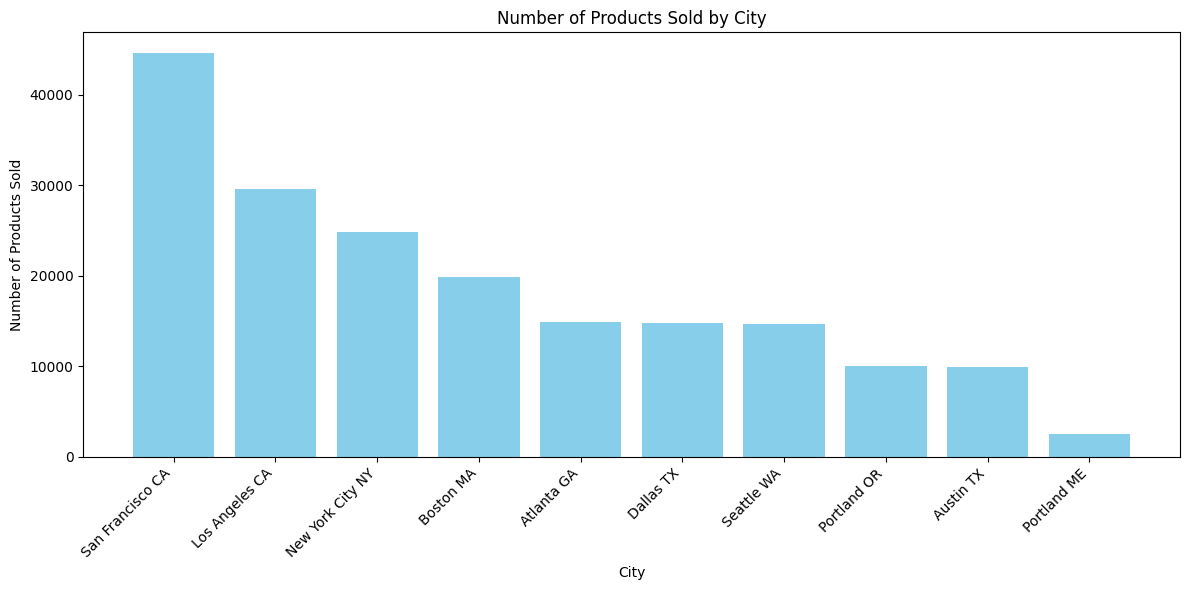

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(sorted_product_counts['City'], sorted_product_counts['Product'], color='skyblue')
plt.title('Number of Products Sold by City')
plt.xlabel('City')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [36]:
# Group the DataFrame by 'City' and 'Product' and calculate the frequency of each combination
frequency_per_combination = df.groupby(['City', 'Product']).size()

# For each city, select the top three most frequently occurring combinations
top_three_frequency_per_city = (
    frequency_per_combination
    .groupby('City', group_keys=False)
    .nlargest(3)
    .reset_index(name='Frequency')
)

# Display the resulting DataFrame
top_three_frequency_per_city


,City,Product,Frequency
0,Atlanta GA,USB-C Charging Cable,1770
1,Atlanta GA,Lightning Charging Cable,1749
2,Atlanta GA,AA Batteries (4-pack),1661
3,Austin TX,Lightning Charging Cable,1225
4,Austin TX,USB-C Charging Cable,1142
5,Austin TX,AAA Batteries (4-pack),1091
6,Boston MA,USB-C Charging Cable,2327
7,Boston MA,Lightning Charging Cable,2314
8,Boston MA,AAA Batteries (4-pack),2299
9,Dallas TX,Lightning Charging Cable,1718


#### What time should we display advertisements to maximize likelihood of customer's buying product?
- Best time to invest in advertising between 11 to 13 or 18 to 20

In [37]:
fig = px.histogram(df, x='Hour', nbins=24, title='Distribution of Hours', labels={'Hour': 'Hour', 'count': 'Frequency'})

# Set the figure size
fig.update_layout(width=1000, height=700)

# Show the plot
fig.show()


#### What products are most often sold together?

In [38]:
# Find duplicated Order IDs and select only those rows
duplicated_data = df[df['Order ID'].duplicated(keep=False)]

# Group by Order ID and join the products in each order
product_join = duplicated_data.groupby('Order ID')['Product'].apply(lambda x: ",".join(x))

# Initialize a Counter to count combinations of products
count = Counter()

# Iterate through the joined product data and count combinations of 2 products
for data in product_join.values:
    # Split the joined products into a list, join it back into a string, and then sort
    products_list = sorted(data.split(','))
    
    # Update the Counter with combinations of 2 products
    count.update(Counter(combinations(products_list, 2)))

# Display the resulting count
count

Counter({('Lightning Charging Cable', 'iPhone'): 1011,
         ('Google Phone', 'USB-C Charging Cable'): 997,
         ('Wired Headphones', 'iPhone'): 462,
         ('Google Phone', 'Wired Headphones'): 422,
         ('Apple Airpods Headphones', 'iPhone'): 373,
         ('USB-C Charging Cable', 'Vareebadd Phone'): 368,
         ('Bose SoundSport Headphones', 'Google Phone'): 228,
         ('USB-C Charging Cable', 'Wired Headphones'): 203,
         ('Vareebadd Phone', 'Wired Headphones'): 149,
         ('Lightning Charging Cable', 'Wired Headphones'): 129,
         ('Apple Airpods Headphones', 'Lightning Charging Cable'): 116,
         ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 106,
         ('Bose SoundSport Headphones', 'USB-C Charging Cable'): 102,
         ('Apple Airpods Headphones', 'Wired Headphones'): 100,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 100,
         ('AAA Batteries (4-pack)', 'USB-C Charging Cable'): 95,
         ('AA Batteries (4-pa

In [53]:
# Create a DataFrame to store combination information
combination_df = pd.DataFrame(list(count.items()), columns=['Product Combination', 'Combination Count'])

# Display the resulting DataFrame
combination_df = combination_df.sort_values('Combination Count', ascending=False)
combination_df.to_csv('combination_df.csv')

#### What product sold the most? Why do you think it sold the most?

In [40]:
# Count the occurrences of each product and create a Series
product_high_sales = df['Product'].value_counts()

# Reset the index to make the result a DataFrame with 'Product' and 'Count' columns
product_high_sales_df = product_high_sales.reset_index()

# Display the resulting DataFrame
product_high_sales_df

,Product,count
0,USB-C Charging Cable,21859
1,Lightning Charging Cable,21610
2,AAA Batteries (4-pack),20612
3,AA Batteries (4-pack),20558
4,Wired Headphones,18849
5,Apple Airpods Headphones,15525
6,Bose SoundSport Headphones,13298
7,27in FHD Monitor,7498
8,iPhone,6840
9,27in 4K Gaming Monitor,6225


In [41]:
# Group the DataFrame by 'Product' and calculate the sum of 'Quantity Ordered', sum 'Sales' and AVG 'Price Each' for each product
sales_by_product = df.groupby('Product').agg({'Quantity Ordered': 'sum', 'Sales': 'sum', 'Price Each': 'mean'})

# Sort the results in descending order based on the sum of quantities
sorted_sales_by_product = sales_by_product.sort_values(by='Quantity Ordered', ascending=False)

# Reset the index to make the result a DataFrame with a new default index
num_sales_product = sorted_sales_by_product.reset_index()

# Show the result
num_sales_product



,Product,Quantity Ordered,Sales,Price Each
0,AAA Batteries (4-pack),30986,"92,648.14",2.99
1,AA Batteries (4-pack),27615,"106,041.60",3.84
2,USB-C Charging Cable,23931,"285,975.45",11.95
3,Lightning Charging Cable,23169,"346,376.55",14.95
4,Wired Headphones,20524,"246,082.76",11.99
5,Apple Airpods Headphones,15637,"2,345,550.00",150.00
6,Bose SoundSport Headphones,13430,"1,342,865.70",99.99
7,27in FHD Monitor,7541,"1,131,074.59",149.99
8,iPhone,6847,"4,792,900.00",700.00
9,27in 4K Gaming Monitor,6239,"2,433,147.61",389.99
